# 3.4 Диагностика модели

В этом уроке мы разберемся с проблемой диагностики регрессионной модели!

Скрипт урока: 

https://stepic.org/media/attachments/lesson/11510/diagnostics.R



In [1]:
#
# regression diagnostics
# 

library(ggplot2)

data(swiss)
str(swiss)

'data.frame':	47 obs. of  6 variables:
 $ Fertility       : num  80.2 83.1 92.5 85.8 76.9 76.1 83.8 92.4 82.4 82.9 ...
 $ Agriculture     : num  17 45.1 39.7 36.5 43.5 35.3 70.2 67.8 53.3 45.2 ...
 $ Examination     : int  15 6 5 12 17 9 16 14 12 16 ...
 $ Education       : int  12 9 5 7 15 7 7 8 7 13 ...
 $ Catholic        : num  9.96 84.84 93.4 33.77 5.16 ...
 $ Infant.Mortality: num  22.2 22.2 20.2 20.3 20.6 26.6 23.6 24.9 21 24.4 ...


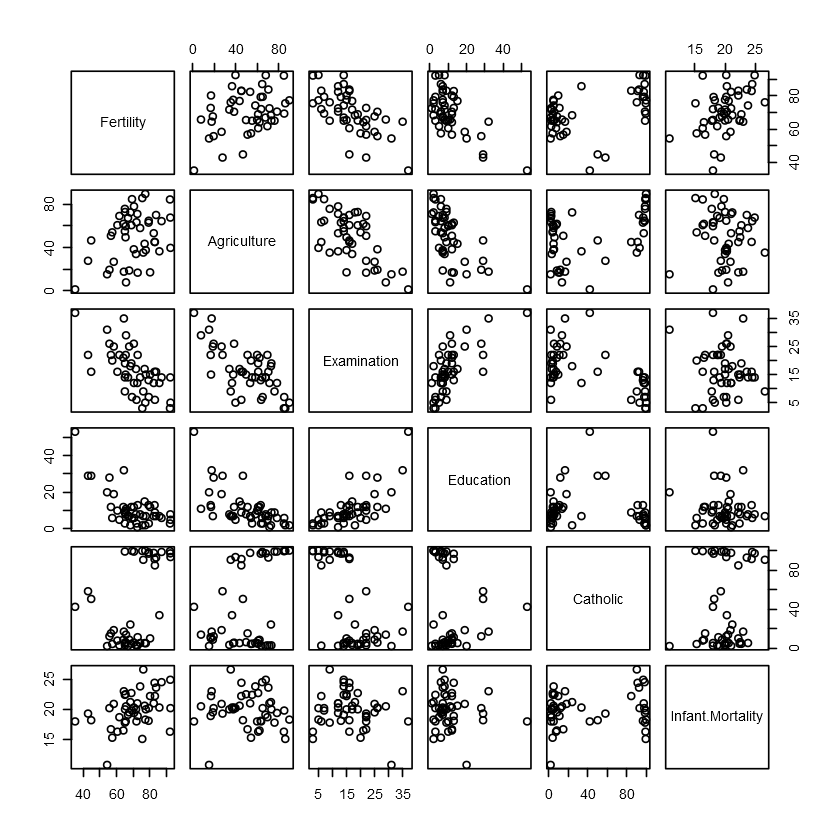

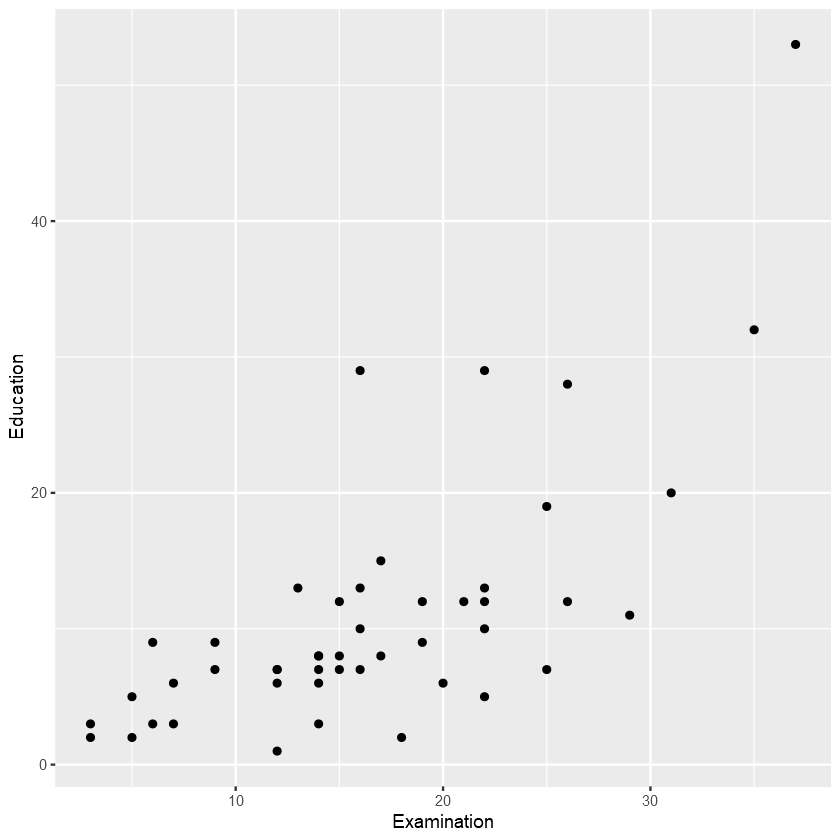

In [2]:
# relationships between all variables
pairs(swiss)

ggplot(swiss, aes(x = Examination, y = Education)) + 
  geom_point()


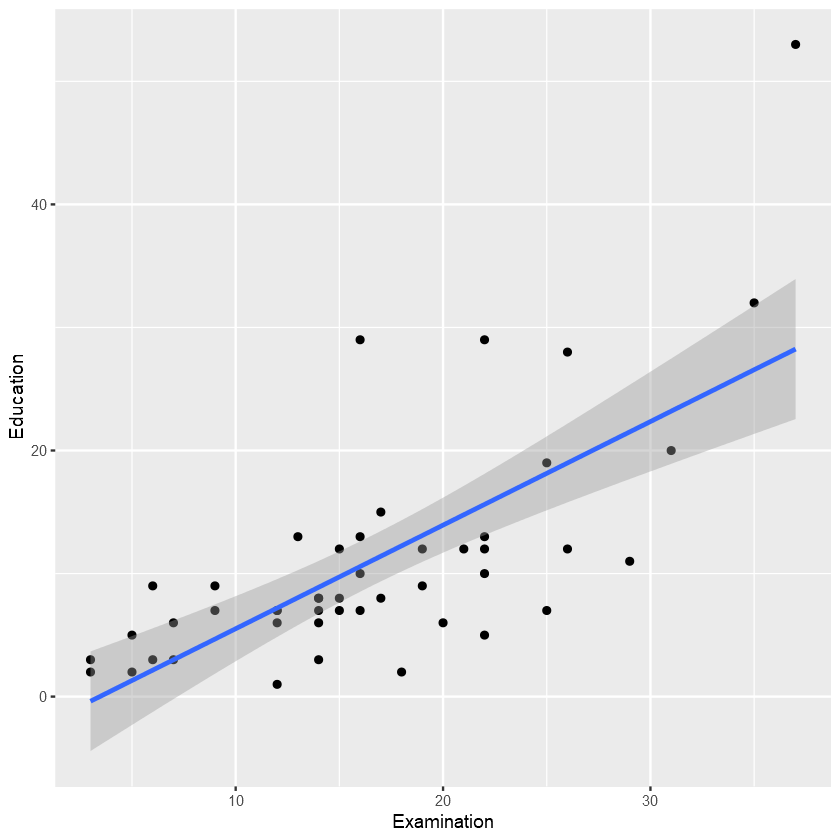

In [3]:
# Outliers

ggplot(swiss, aes(x = Examination, y = Education)) + 
  geom_point() + 
  geom_smooth(method = 'lm')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


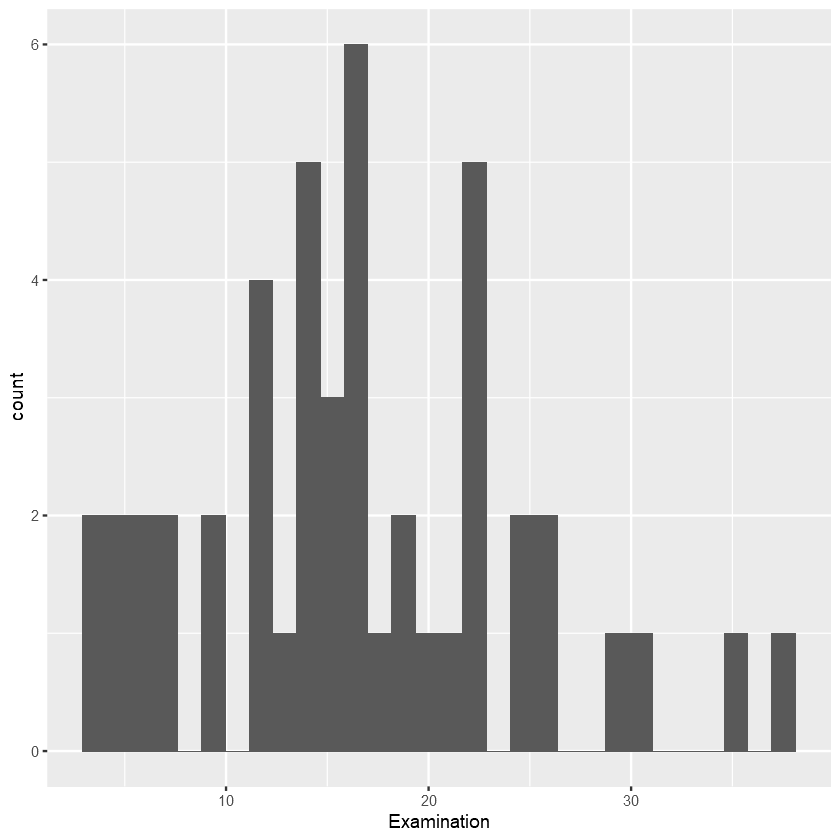

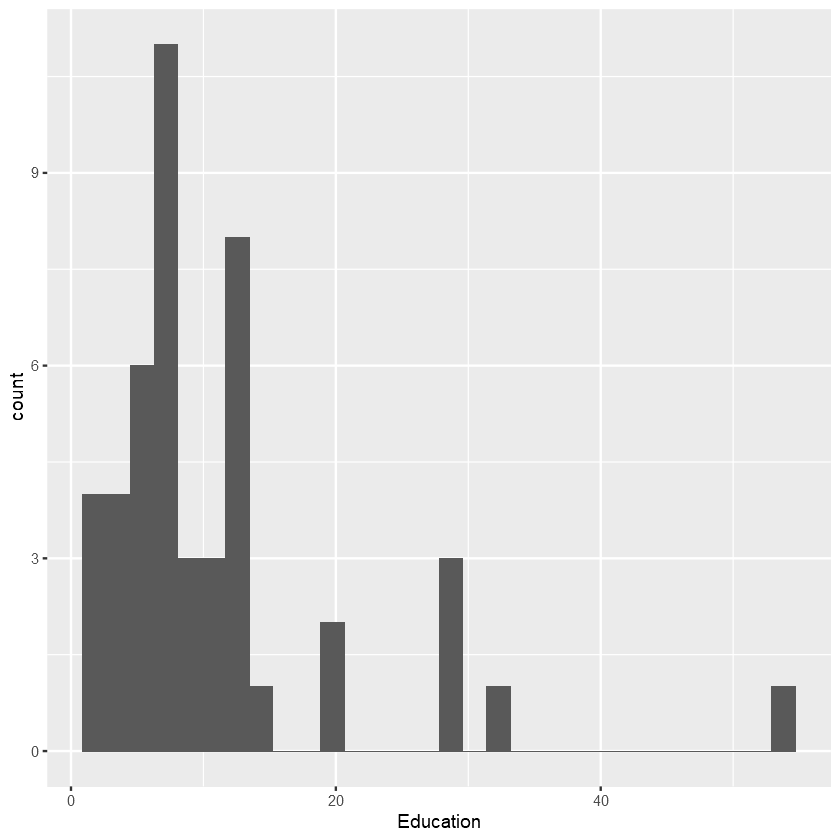

In [4]:
# Normality of variables distributions

ggplot(swiss, aes(x = Examination)) + 
  geom_histogram()

ggplot(swiss, aes(x = Education)) + 
  geom_histogram()


В переменной my_vector хранится вектор значений.
```r
my_vector <- c(0.027, 0.079, 0.307, 0.098, 0.021, 0.091, 0.322, 0.211, 0.069, 0.261, 0.241, 0.166, 0.283, 0.041, 0.369, 0.167, 0.001, 0.053, 0.262, 0.033, 0.457, 0.166, 0.344, 0.139, 0.162, 0.152, 0.107, 0.255, 0.037, 0.005, 0.042, 0.220, 0.283, 0.050, 0.194, 0.018, 0.291, 0.037, 0.085, 0.004, 0.265, 0.218, 0.071, 0.213, 0.232, 0.024, 0.049, 0.431, 0.061, 0.523)
```
Какое преобразование позволяет сделать его распределение нормальным (согласно shapiro.test)?

In [25]:
my_vector <- c(0.027, 0.079, 0.307, 0.098, 0.021, 0.091, 0.322, 0.211, 0.069, 0.261, 0.241, 0.166, 0.283, 0.041, 0.369, 0.167, 0.001, 0.053, 0.262, 0.033, 0.457, 0.166, 0.344, 0.139, 0.162, 0.152, 0.107, 0.255, 0.037, 0.005, 0.042, 0.220, 0.283, 0.050, 0.194, 0.018, 0.291, 0.037, 0.085, 0.004, 0.265, 0.218, 0.071, 0.213, 0.232, 0.024, 0.049, 0.431, 0.061, 0.523)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


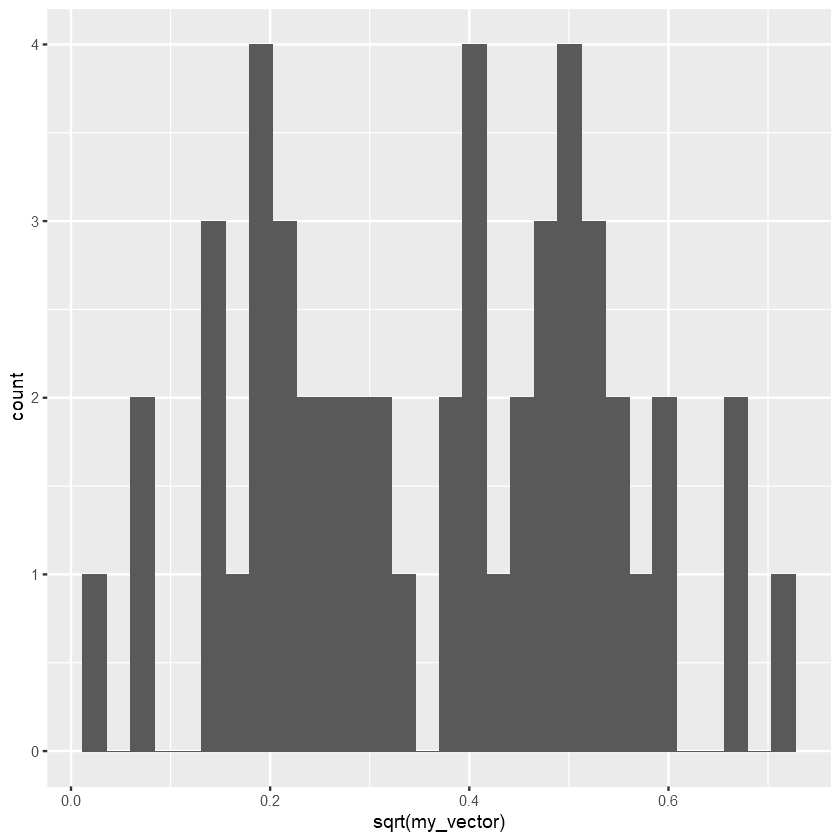

In [37]:
ggplot(as.data.frame(my_vector) ,aes(x = sqrt(my_vector) ))+
 geom_histogram()

Функция scale() позволяет совершить стандартизацию вектора, то есть делает его среднее значение равным нулю, а стандартное отклонение - единице (Z-преобразование). 

Стандартизованный коэффициент регрессии (β) можно получить, если предикторы и зависимая переменная стандартизованы.

Напишите функцию, которая на вход получает dataframe с двумя количественными переменными, а возвращает стандартизованные коэффициенты для регрессионной модели, в которой первая переменная датафрейма выступает в качестве зависимой, а вторая в качестве независимой.

Примеры работы функции.

```r
> beta.coef(mtcars[,c(1,3)])

-7.036582e-17 -8.475514e-01

> beta.coef(swiss[,c(1,4)])

3.603749e-16 -6.637889e-01 

```
Подсказка:
```
?scale
```

In [75]:
as.vector(lm(scale(df[,1]) ~ scale(df[,2]), df  )$coefficients)

[1]  4.606769e-16 -6.637889e-01

Напишите функцию normality.test, которая получает на вход dataframe с количественными переменными, проверяет распределения каждой переменной на нормальность с помощью функции shapiro.test. Функция должна возвращать вектор с значениями p - value, полученного в результате проверки на нормальность каждой переменной. Названия элементов вектора должны совпадать с названиями переменных. 

Пример работы функции:


> normality.test(mtcars[,1:6])


         mpg          cyl         disp           hp         drat           wt 
1.228814e-01 6.058338e-06 2.080657e-02 4.880824e-02 1.100608e-01 9.265499e-02 



> normality.test(iris[,-5])


Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
1.018116e-02 1.011543e-01 7.412263e-10 1.680465e-08 


In [ ]:
names(s) <- names(df)

In [193]:
df <- mtcars[,1:6]

In [222]:
s <- as.numeric((sapply(df, shapiro.test)[2,]))

In [223]:
names(s) <- names(df)

In [224]:
s

mpg          cyl         disp           hp         drat           wt 
1.228814e-01 6.058338e-06 2.080657e-02 4.880824e-02 1.100608e-01 9.265499e-02

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


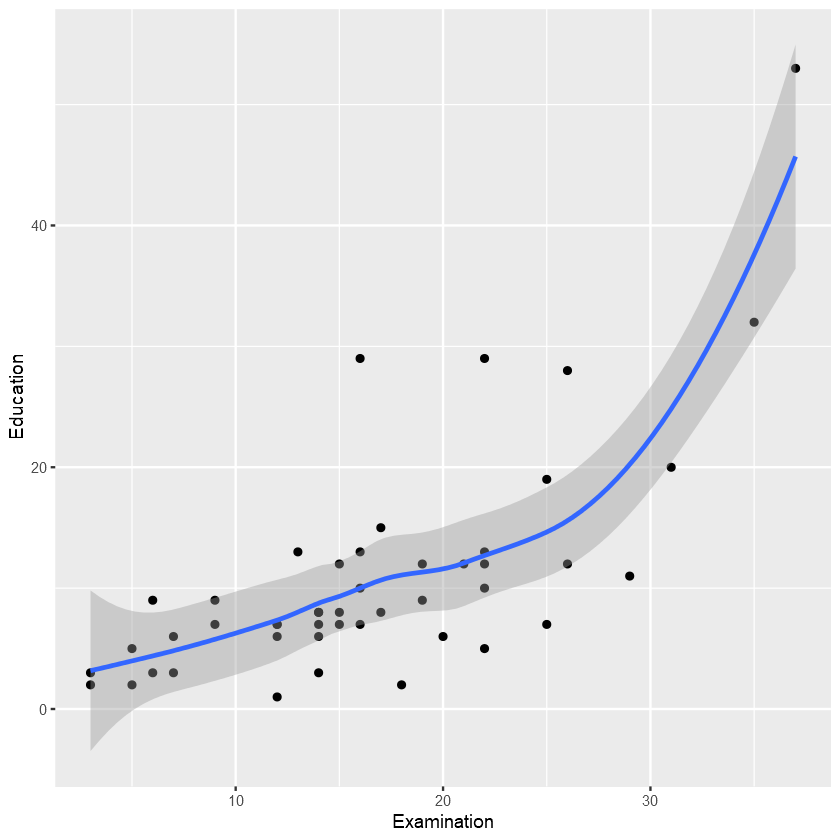

In [5]:
# linearity 

ggplot(swiss, aes(x = Examination, y = Education)) + 
  geom_point() + 
  geom_smooth()

In [6]:
lm1 <- lm(Education ~ Examination, swiss)
summary(lm1)


Call:
lm(formula = Education ~ Examination, data = swiss)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.1427  -3.4877  -0.8833   2.7212  24.7560 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.9015     2.3507  -1.234    0.223    
Examination   0.8418     0.1286   6.546 4.81e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.958 on 45 degrees of freedom
Multiple R-squared:  0.4878,	Adjusted R-squared:  0.4764 
F-statistic: 42.85 on 1 and 45 DF,  p-value: 4.811e-08


In [7]:
swiss$Examination_squared <- (swiss$Examination)^2

lm2 <- lm(Education ~ Examination + Examination_squared, swiss)
summary(lm2)




Call:
lm(formula = Education ~ Examination + Examination_squared, data = swiss)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.2922  -3.0945  -0.6397   1.5874  20.6391 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)   
(Intercept)          6.96590    3.66352   1.901  0.06381 . 
Examination         -0.49840    0.42147  -1.183  0.24334   
Examination_squared  0.03660    0.01106   3.308  0.00188 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.297 on 44 degrees of freedom
Multiple R-squared:  0.5898,	Adjusted R-squared:  0.5712 
F-statistic: 31.63 on 2 and 44 DF,  p-value: 3.058e-09


In [8]:
anova(lm2, lm1)


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
44,1744.492,NA,NA,NA,NA
45,2178.444,-1,-433.9519,10.94524,0.001876988


In [9]:
swiss$lm1_fitted <- lm1$fitted
swiss$lm2_fitted <- lm2$fitted
swiss$lm1_resid <- lm1$resid
swiss$lm2_resid <- lm2$resid
swiss$obs_number <- 1:nrow(swiss)

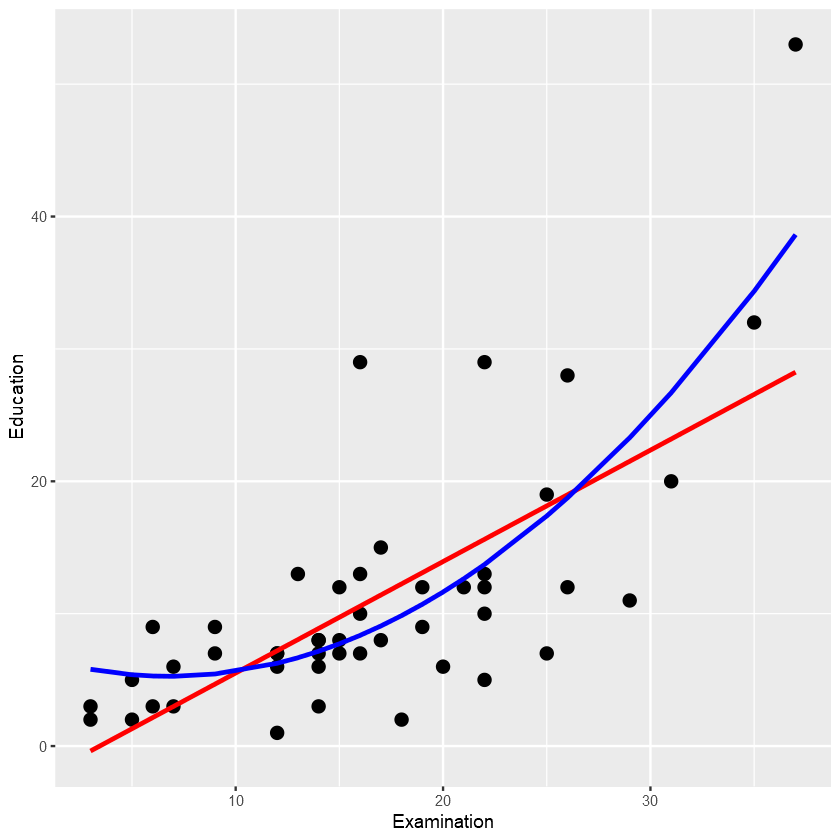

In [10]:
ggplot(swiss, aes(x = Examination, y = Education)) + 
  geom_point(size = 3) + 
  geom_line(aes(x = Examination, y = lm1_fitted), col = 'red', lwd=1) +
  geom_line(aes(x = Examination, y = lm2_fitted), col = 'blue', lwd=1)


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


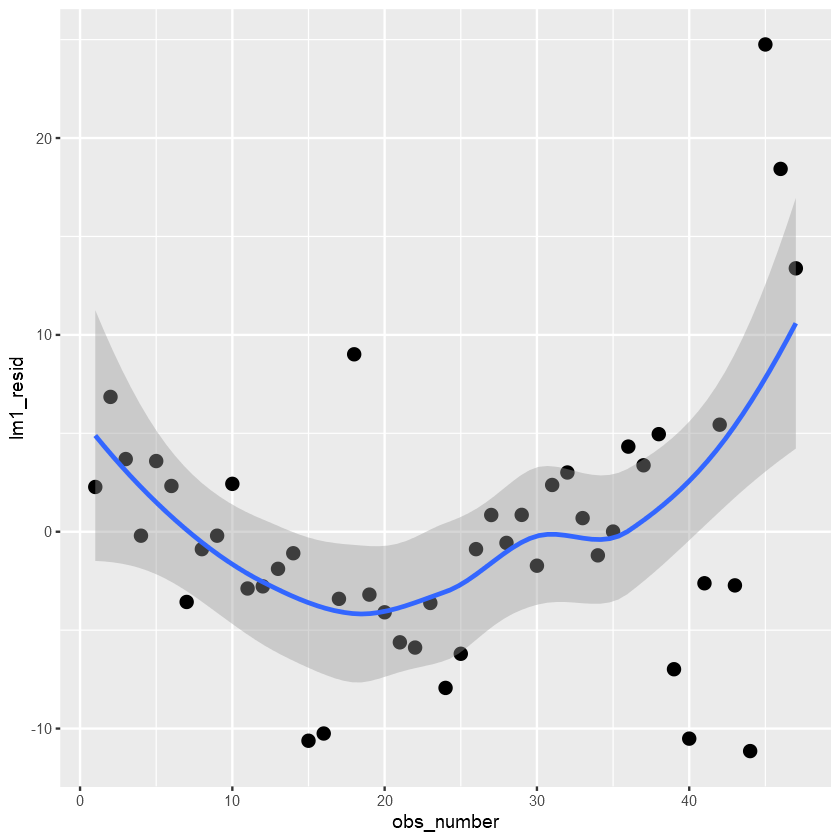

In [13]:
# independence of errors

ggplot(swiss, aes(x = obs_number, y = lm1_resid)) + 
  geom_point(size = 3) + geom_smooth()


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


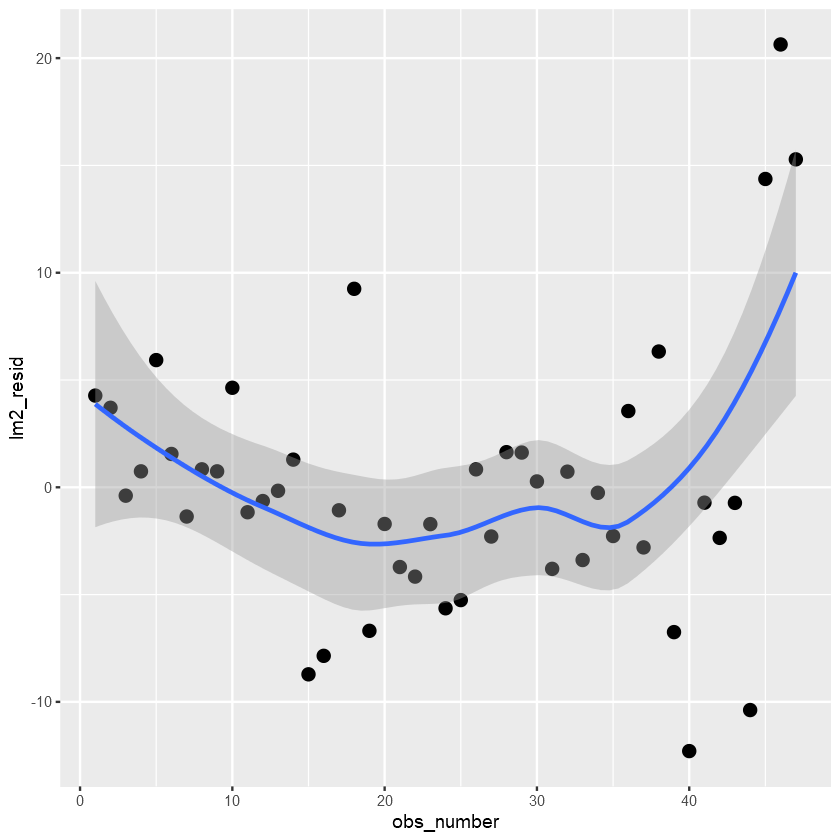

In [14]:
ggplot(swiss, aes(x = obs_number, y = lm2_resid)) + 
  geom_point(size = 3) + geom_smooth()


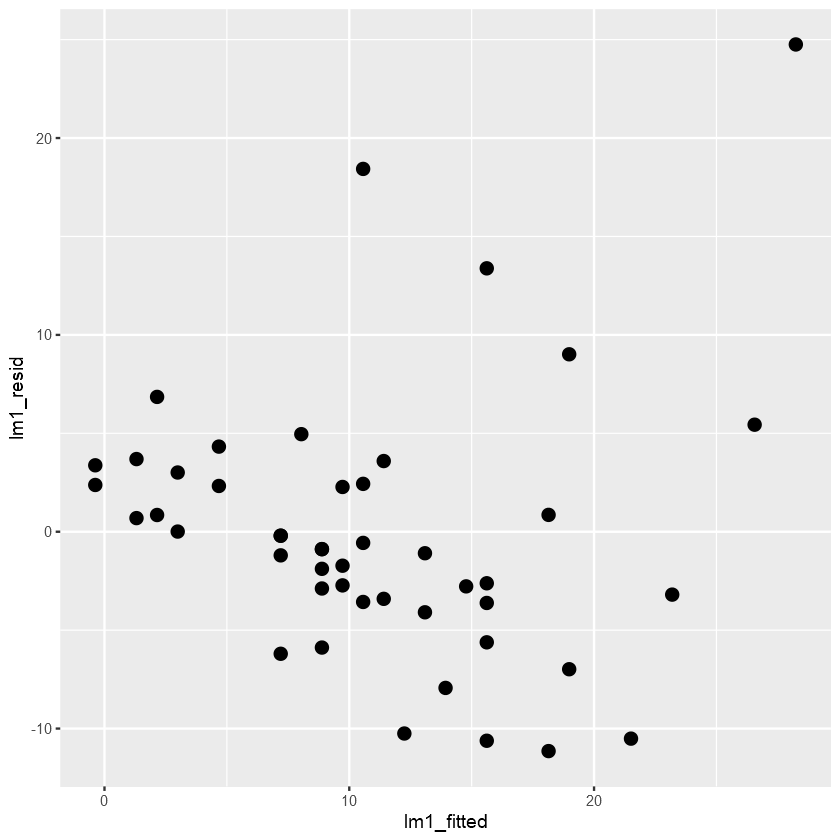

In [15]:
# Homoscedasticity

ggplot(swiss, aes(x = lm1_fitted, y = lm1_resid)) + 
  geom_point(size = 3)


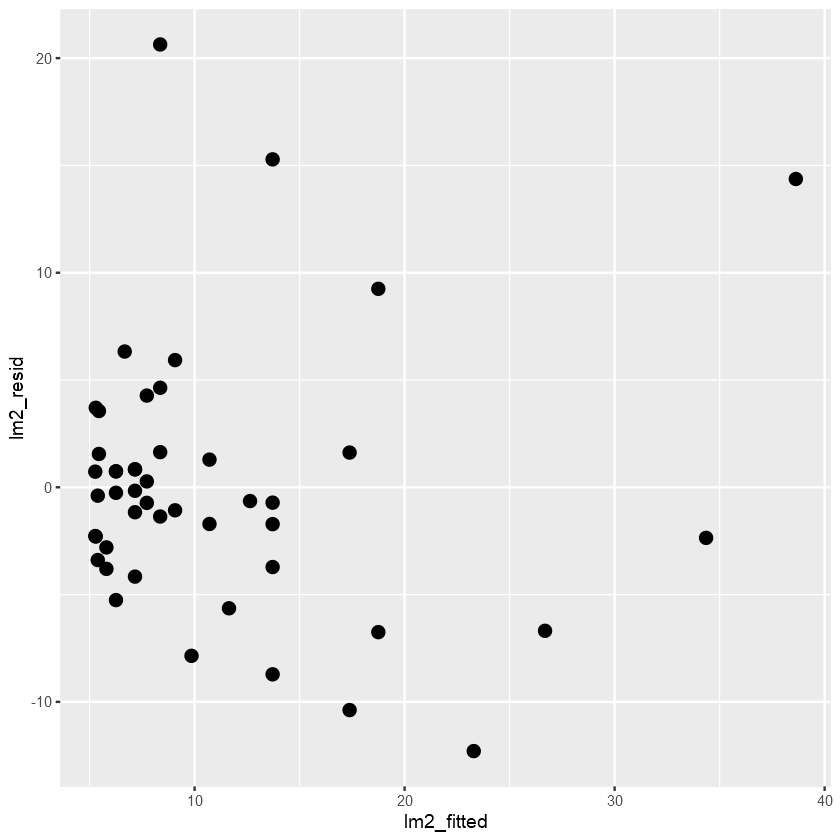

In [16]:
ggplot(swiss, aes(x = lm2_fitted, y = lm2_resid)) + 
  geom_point(size = 3)


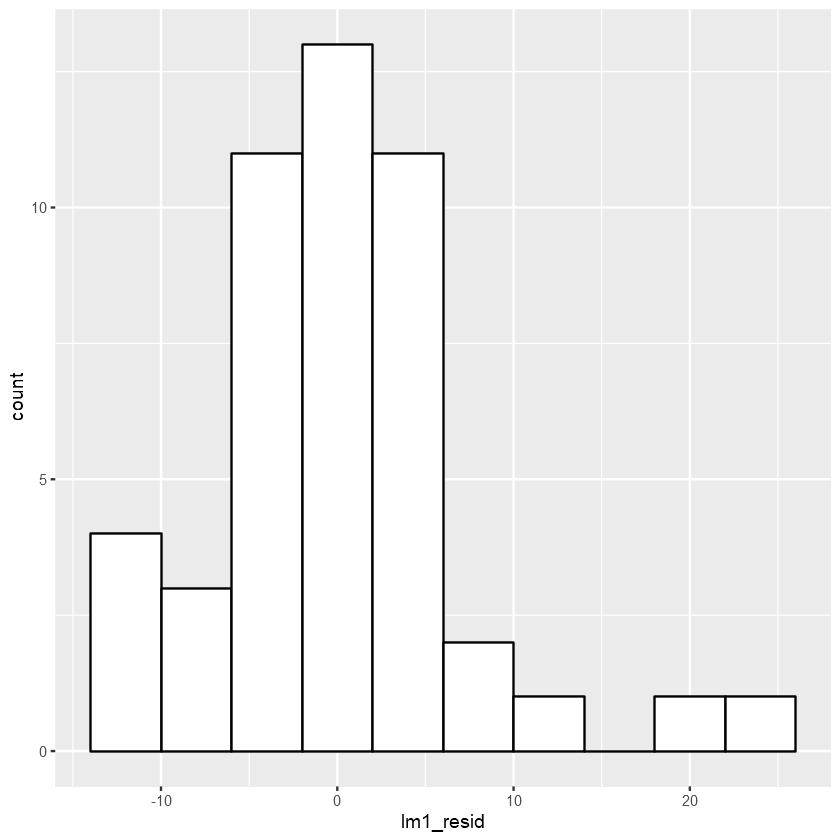

In [17]:
# Errors Normally distributed

ggplot(swiss, aes(x = lm1_resid)) + 
  geom_histogram(binwidth = 4, fill = 'white', col = 'black')


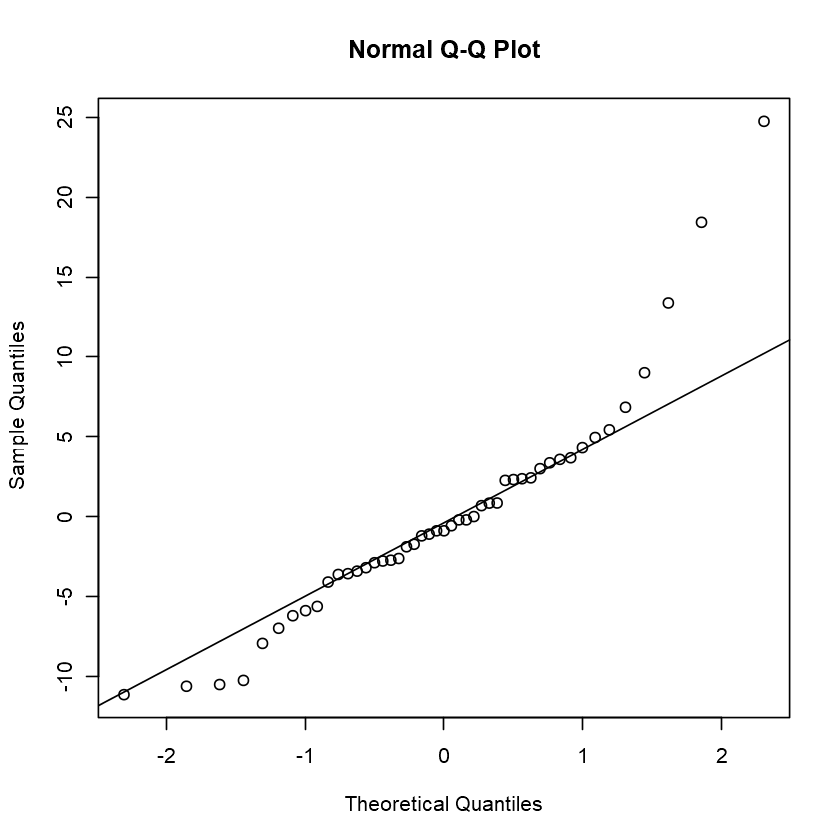

In [18]:
qqnorm(lm1$residuals)
qqline(lm1$residuals)


In [19]:
shapiro.test(lm1$residuals)



	Shapiro-Wilk normality test

data:  lm1$residuals
W = 0.90482, p-value = 0.00103


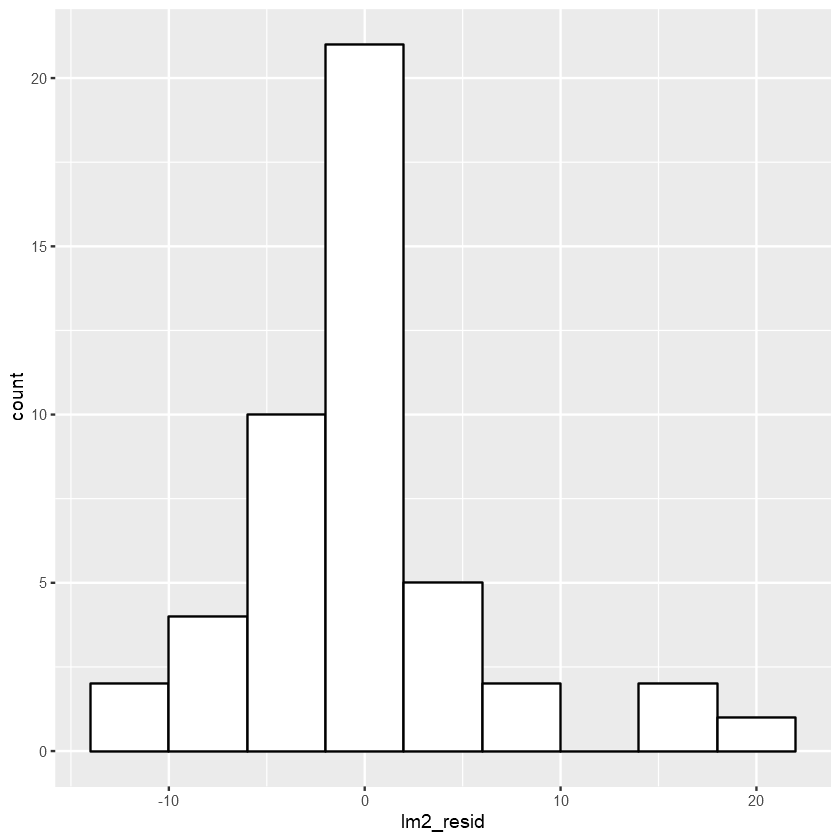

In [20]:
ggplot(swiss, aes(x = lm2_resid)) + 
  geom_histogram(binwidth = 4, fill = 'white', col = 'black')


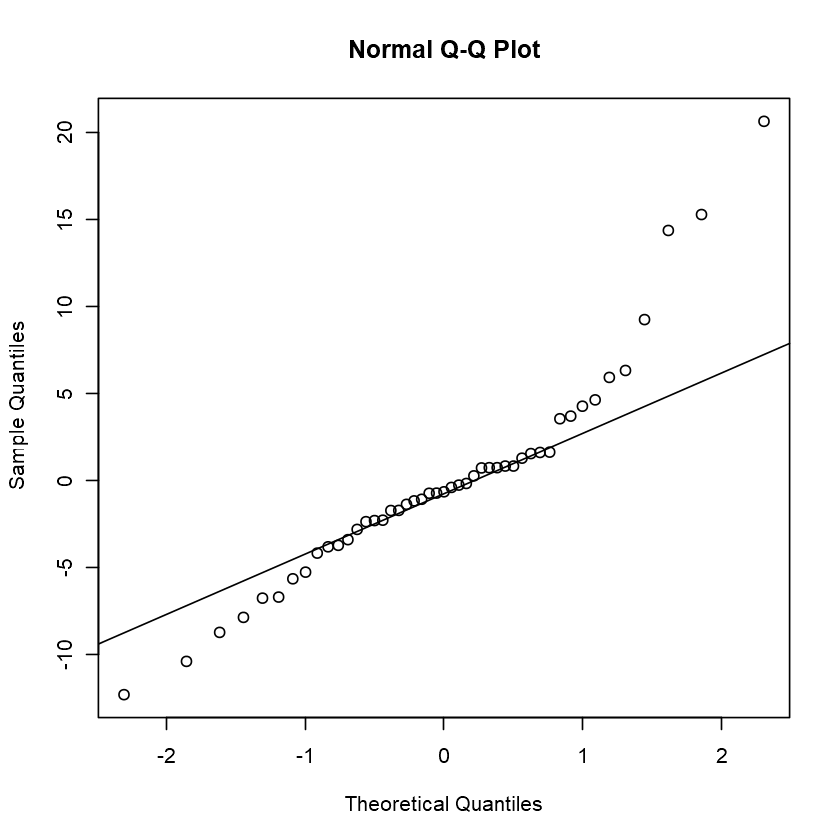

In [21]:
qqnorm(lm2$residuals)
qqline(lm2$residuals)

In [22]:
shapiro.test(lm2$residuals)


	Shapiro-Wilk normality test

data:  lm2$residuals
W = 0.91537, p-value = 0.002314


____________________________________________________________


Функция gvlma() из библиотеки gvlma позволяет получить оценку выполнения основных допущений линейной регрессии. В качестве аргумента она принимает объект, в который сохранена модель. Можно задать формулу модели прямо в функции gvlma. Чтобы увидеть основные статистики, нужно выполнить команду summary для объекта, созданного с помощью функции gvlma. 

Например,
```r

x <- gvlma(fit)

# или

x <- gvlma(Y ~ X, data = mydata)

summary(x)
```

Загрузите себе прикреплённый к этому степу датасет и постройте регрессию, предсказывающую DV по IV. Установите библиотеку gvlma и проверьте, удовлетворяется ли в этой модели требование гомоскедастичности. Введите в поле ответа p-значение для теста гетероскедастичности. 

Данные: https://stepic.org/media/attachments/lesson/12088/homosc.csv

In [240]:
df <- read.csv('https://stepic.org/media/attachments/lesson/12088/homosc.csv')

In [241]:
install.packages('gvlma')

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  не могу открыть URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"Warning message:
"package 'gvlma' is in use and will not be installed"

In [242]:
library(gvlma)

In [243]:
x <- gvlma(DV ~ IV, df)

In [249]:
summary(x)


Call:
lm(formula = DV ~ IV, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-18.644  -5.476  -1.216   5.885  27.937 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  3.78707    5.71128   0.663    0.510   
IV           0.26617    0.08513   3.127    0.003 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.626 on 48 degrees of freedom
Multiple R-squared:  0.1692,	Adjusted R-squared:  0.1519 
F-statistic: 9.776 on 1 and 48 DF,  p-value: 0.003001


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = DV ~ IV, data = df) 

                     Value  p-value                   Decision
Global Stat        13.4206 0.009393 Assumptions NOT satisfied!
Skewness            5.3467 0.020762 Assumptions NOT satisfied!
Kurtosis            3.8634 0.049351 Assumptions NOT satisfied!
Link Function       0.1553 0.693511    Assum

In [245]:
?gvlma

In [274]:
resid.norm  <- function(fit){
  if (shapiro.test(fit$resid)$p.value < 0.05){
    f <- ggplot(as.data.frame(fit$resid),aes ( x = fit$resid ) )+
            geom_histogram(fill = 'red')
}else{
   f <-  ggplot(as.data.frame(fit$resid),aes ( x = fit$resid ) )+
          geom_histogram(fill = 'green')
}
    return(f)
}

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


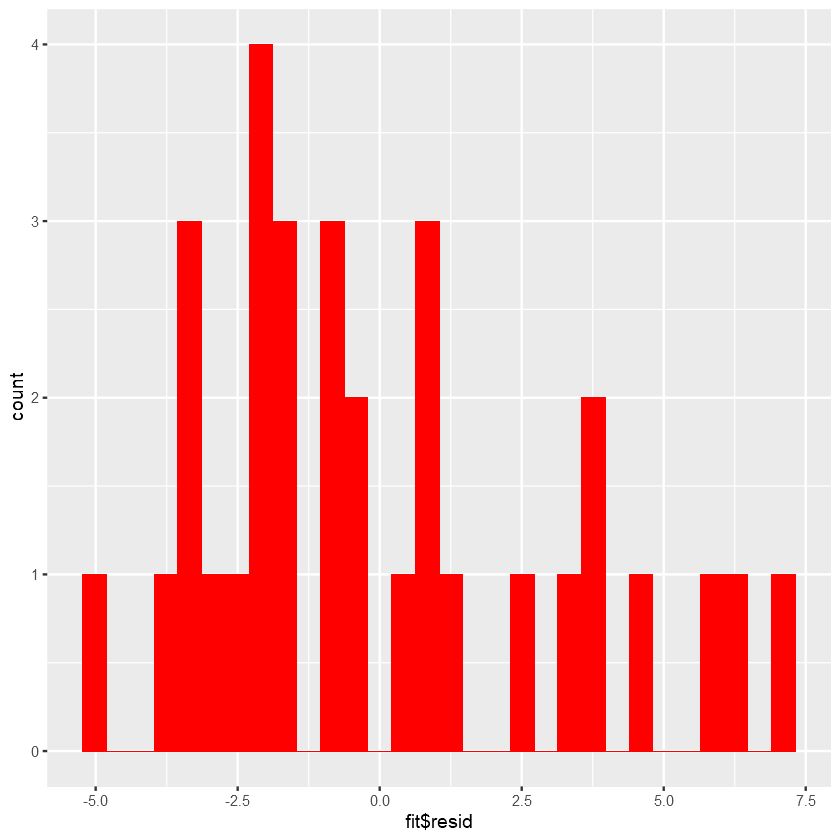

In [275]:
resid.norm(lm(mpg ~ disp, mtcars))

Задача для супергероев!!!

Ещё одной проблемой регрессионных моделей может стать мультиколлинеарность - ситуация, когда предикторы очень сильно коррелируют между собой. Иногда корреляция между двумя предикторами может достигать 1, например, когда два предиктора - это одна и та же переменная, измеренная в разных шкалах (x1 - рост в метрах, x2 - рост в сантиметрах)  

Проверить данные на мультиколлинеарность можно по графику pairs() и посчитав корреляцию между всеми предикторами c помощью функции cor.

Напишите функцию high.corr, которая принимает на вход датасет с произвольным числом количественных переменных и возвращает вектор с именами двух переменных с максимальным абсолютным значением коэффициента корреляции . 

Примеры работы функции:
```r
> high.corr(swiss)
[1] "Examination" "Education"

> high.corr(iris[,-5])
[1] "Petal.Length" "Petal.Width"

> x1 <- rnorm(30) # создадим случайную выборку
> x2 <- rnorm(30) # создадим случайную выборку
> x3  <- x1 + 5 # теперь коэффициент корреляции x1 и x3 равен единице
> my_df <- data.frame(var1 = x1, var2 = x2, var3 = x3)
> high.corr(my_df)
[1] "var1" "var3"

```

Вам могут понадобиться следующие функции: which, dimnames, colnames, rownames, diag, abs. Посмотрите справку по ним.

Подсказки:
Далеко не всегда 1 == 1 есть ТRUE! Смотри закрепленный комментарий или можно почитать о проблеме здесь.

In [327]:
high.corr <- function(x){
    x <- cor(x)
    diag(x) <- diag(x) -1
    loc1 <- which(abs(x)==max(abs(x)), arr.ind=TRUE)[1]
    loc2 <- which(abs(x)==max(abs(x)), arr.ind=TRUE)[2]
    return( c(colnames(x)[loc2], colnames(x)[loc1]))
}

In [328]:
high.corr(iris[,-5])

[1] "Petal.Length" "Petal.Width"